In [82]:
import re
import unicodedata

import pandas as pd
import numpy as np

from pandas import Series, DataFrame
from collections import Counter

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import grid_search

from scipy.sparse import lil_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split


import warnings;
with warnings.catch_warnings():
    warnings.simplefilter("ignore"); 
    import matplotlib.pyplot as plt    
%matplotlib inline

In [1]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
train_df = pd.read_json("train.json")

In [3]:
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii

In [4]:
def clean_df(df):
    df['ingredients_clean'] = [[remove_accents(item) for item in line] for line in df['ingredients']] 
    df['ingredients_clean'] = [[re.sub(r'\(.*\)\s', '', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'low.*fat', 'lowfat', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'non.*fat', 'nonfat', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'reduced.*fat', 'reducedfat', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'.*\% (low)|(reduced)|(non) ', '', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'.*lb. ', '', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'.*% ', '', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'^all.*purpose ', '', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'^[!@#$%^&*.,]\s', '', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[item.split(',')[0].strip() for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[re.sub(r'[0-9]+ ounc\s', '', item.strip()) for item in line] for line in df['ingredients_clean']]  
    df['ingredients_clean'] = [[WordNetLemmatizer().lemmatize(item) for item in line] for line in df['ingredients_clean']]       
    df['ingredients_clean'] = [[PorterStemmer().stem(item) for item in line] for line in df['ingredients_clean']]       

In [5]:
clean_df(train_df)

In [6]:
train_df

,cuisine,id,ingredients,ingredients_clean
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuc, black ol, grape tomato, garli..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","[plain flour, ground pepp, salt, tomato, groun..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[egg, pepper, salt, mayonais, cooking oil, gre..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","[black pepp, shallot, cornflour, cayenne pepp,..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...","[plain flour, sugar, butter, egg, fresh ginger..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...","[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...","[sugar, pistachio nut, white almond bark, flou..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...","[olive oil, purple onion, fresh pineappl, pork..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...","[chopped tomato, fresh basil, garlic, extra-vi..."


In [7]:
test_df = pd.read_json("test.json") 
clean_df(test_df)

In [8]:
train_df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [9]:
train_df[train_df.cuisine == 'french']

,cuisine,id,ingredients,ingredients_clean
46,french,18515,"[sugar, salt, fennel bulb, water, lemon olive ...","[sugar, salt, fennel bulb, water, lemon olive ..."
67,french,275,"[vanilla, milk, large egg yolks, sugar, corn s...","[vanilla, milk, large egg yolk, sugar, corn st..."
68,french,43769,"[orange juice concentrate, pumpkin purée, mars...","[orange juice concentr, pumpkin pure, marshmal..."
82,french,6886,"[Madeira, foie gras, demi-glace, sherry vinega...","[Madeira, foie gra, demi-glac, sherry vinegar,..."
134,french,39471,"[grated parmesan cheese, asparagus, bacon slic...","[grated parmesan chees, asparagu, bacon slic, ..."
145,french,9069,"[fennel seeds, kalamata, capers, dried oregano...","[fennel se, kalamata, caper, dried oregano, gr..."
164,french,7501,"[tomatoes, olive oil, chopped fresh thyme, sal...","[tomato, olive oil, chopped fresh thym, salt, ..."
171,french,40064,"[pepper, grated Gruyère cheese, heavy cream, s...","[pepper, grated Gruyere chees, heavy cream, sa..."
208,french,36862,"[eau de vie, leaves, cane sugar, pinenuts, gol...","[eau de vi, leaf, cane sugar, pinenut, golden ..."
222,french,18643,"[2% reduced-fat milk, corn starch, eggs, maple...","[fat milk, corn starch, egg, maple syrup, suga..."


In [10]:
french_ingredients = train_df[train_df.cuisine == 'french']['ingredients']
c = Counter(",".join([",".join(_) for _ in french_ingredients.values]).split(","))
c.most_common(10)

[(u'salt', 1203),
 (u'sugar', 637),
 (u'all-purpose flour', 593),
 (u'unsalted butter', 592),
 (u'olive oil', 516),
 (u'butter', 514),
 (u'water', 439),
 (u'large eggs', 415),
 (u'garlic cloves', 403),
 (u'ground black pepper', 385)]

In [11]:
french_ingredients = train_df[train_df.cuisine == 'french']['ingredients_clean']
c = Counter(",".join([",".join(_) for _ in french_ingredients.values]).split(","))
c.most_common(10)

[(u'salt', 1203),
 (u'flour', 678),
 (u'sugar', 637),
 (u'unsalted butt', 592),
 (u'olive oil', 516),
 (u'butter', 514),
 (u'water', 439),
 (u'large egg', 415),
 (u'garlic clov', 403),
 (u'ground black pepp', 385)]

In [12]:
train_df.cuisine.unique()

array([u'greek', u'southern_us', u'filipino', u'indian', u'jamaican',
       u'spanish', u'italian', u'mexican', u'chinese', u'british', u'thai',
       u'vietnamese', u'cajun_creole', u'brazilian', u'french',
       u'japanese', u'irish', u'korean', u'moroccan', u'russian'], dtype=object)

In [13]:
cuisines = [u'greek', u'southern_us', u'filipino', u'indian', u'jamaican',
       u'spanish', u'italian', u'mexican', u'chinese', u'british', u'thai',
       u'vietnamese', u'cajun_creole', u'brazilian', u'french',
       u'japanese', u'irish', u'korean', u'moroccan', u'russian']

In [14]:
ingredient_dict = {}
for cuisine in cuisines:
    ingredient_dict[cuisine] = Counter(",".join(
            [",".join(_) for _ in train_df[train_df.cuisine == cuisine]['ingredients_clean'].values]).split(","))

In [15]:
ingredient_dict['french'].most_common(10)

[(u'salt', 1203),
 (u'flour', 678),
 (u'sugar', 637),
 (u'unsalted butt', 592),
 (u'olive oil', 516),
 (u'butter', 514),
 (u'water', 439),
 (u'large egg', 415),
 (u'garlic clov', 403),
 (u'ground black pepp', 385)]

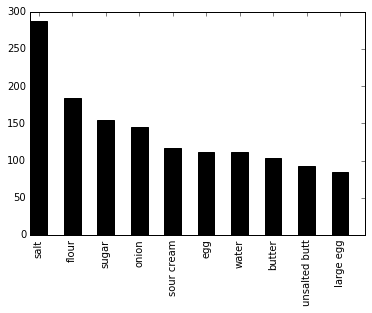

In [16]:
labels, values =  zip(*ingredient_dict[cuisine].most_common(10))
indexes = np.arange(len(labels))
width = 0.5

for cuisine in cuisines:
    plt.bar(indexes, values, width, color='black')
    plt.xticks(indexes + width/2., labels, rotation='vertical')
    plt.show()

In [19]:
c = Counter(";".join([";".join(_) for _ in train_df.ingredients.values]).split(";"))

In [20]:
list(c.keys()).index("butter")
ingredients_index = list(c.keys())

In [21]:
%%time
n = train_df.shape[0]
m = len(c.keys())
X = lil_matrix((n, m), dtype=np.int)
y = np.zeros(n, dtype=np.int)
for recipe in range(n):
    y[recipe] = cuisines.index(train_df.loc[recipe].cuisine)
    for ingr in train_df.loc[recipe].ingredients:
        X[recipe, ingredients_index.index(ingr)] = 1

CPU times: user 1min 25s, sys: 974 ms, total: 1min 26s
Wall time: 1min 25s


In [22]:
y[:500]

array([ 0,  1,  2,  3,  3,  4,  5,  6,  7,  6,  6,  8,  6,  7,  6,  3,  9,
        6, 10, 11, 10,  7,  1,  8,  6,  8, 12,  6,  8,  7,  6, 12,  7, 10,
        6, 12,  6,  2,  1,  1,  6, 13,  7,  3,  7,  8, 14,  1,  1,  1, 15,
        1,  6,  1,  6,  4, 15,  3,  6, 16, 10, 10,  3,  4,  6, 10, 17, 14,
       14,  1,  5,  3, 18,  6,  6, 18, 18, 11, 15,  7, 12,  1, 14,  3,  3,
        6,  6,  3, 17,  5,  6,  1,  1,  0,  7,  7,  1,  3,  6,  6,  6, 15,
        6,  0, 17,  3,  7,  1, 16, 17,  8,  7,  1,  8, 18, 16,  8, 16,  7,
        6,  6,  6,  4,  7, 15,  5,  8,  7,  9,  3, 10,  1,  7,  5, 14,  6,
        3,  9,  5,  6, 17,  3,  7,  7,  1, 14, 12,  3,  8,  6,  6,  6,  1,
        0, 15, 12,  6, 17,  7,  3,  6,  7, 17,  8, 14,  8,  5,  8,  5, 15,
        7, 14, 15,  7,  6,  2,  1,  6,  6,  8,  7,  3, 17,  7,  7, 15,  0,
        7,  1,  8,  9, 15,  6,  7, 16,  0, 12, 15,  6,  1,  1,  1,  6,  3,
        8, 15,  7,  7, 14,  7,  7, 16,  8,  7,  0, 17,  7,  5,  6,  1,  6,
        7, 14,  7, 14,  2

In [23]:
X

<39774x6714 sparse matrix of type '<type 'numpy.int64'>'
	with 428249 stored elements in LInked List format>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
%%time
ind = np.array((X.sum(axis=0) < 1000) & (X.sum(axis=0) > 5)).ravel()
logistic = LogisticRegression()
logistic.fit(X_train[:, ind], y_train)
print('LogisticRegression score: %f' % logistic.score(X_test[:, ind], y_test))

LogisticRegression score: 0.737524
CPU times: user 10.1 s, sys: 688 ms, total: 10.7 s
Wall time: 3.17 s


In [26]:
res = []
logmax = np.log10(18049) # (u'salt', 18049)
for lower_bound in np.logspace(0, 3, num=10):
    for upper_bound in np.logspace(np.log(lower_bound), logmax, num=10):
        ind = np.array((X.sum(axis=0) <= upper_bound) & (X.sum(axis=0) >= lower_bound)).ravel()
        logistic = LogisticRegression()
        logistic.fit(X_train[:, ind], y_train)
        score = logistic.score(X_test[:, ind], y_test)
        print('LogisticRegression score: %f' % score)
        res.append((lower_bound, upper_bound, score))

LogisticRegression score: 0.199120
LogisticRegression score: 0.203268
LogisticRegression score: 0.242489
LogisticRegression score: 0.334507
LogisticRegression score: 0.465619
LogisticRegression score: 0.616719
LogisticRegression score: 0.716656
LogisticRegression score: 0.764299
LogisticRegression score: 0.774230
LogisticRegression score: 0.774230
LogisticRegression score: 0.219233
LogisticRegression score: 0.280704
LogisticRegression score: 0.362791
LogisticRegression score: 0.477058
LogisticRegression score: 0.605280
LogisticRegression score: 0.702828
LogisticRegression score: 0.747832
LogisticRegression score: 0.769453
LogisticRegression score: 0.774481
LogisticRegression score: 0.774356
LogisticRegression score: 0.356003
LogisticRegression score: 0.443620
LogisticRegression score: 0.536518
LogisticRegression score: 0.635449
LogisticRegression score: 0.704840
LogisticRegression score: 0.740163
LogisticRegression score: 0.762791
LogisticRegression score: 0.769202
LogisticRegression s

In [27]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print('LogisticRegression score: %f' % logistic.score(X_test, y_test))

LogisticRegression score: 0.774356
CPU times: user 26.9 s, sys: 945 ms, total: 27.8 s
Wall time: 7.17 s


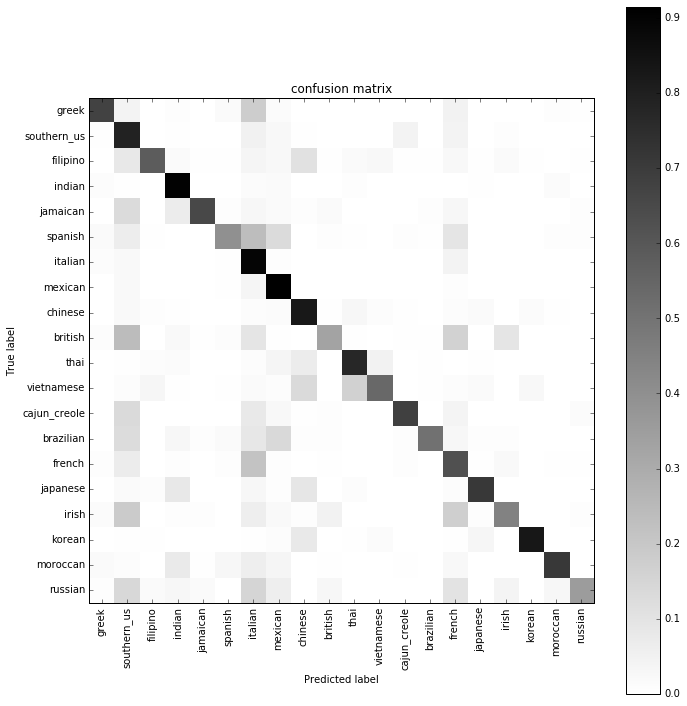

In [28]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, logistic.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.binary)
plt.title("confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.png', dpi=200)

In [29]:
%%time
n = test_df.shape[0]
m = len(c.viewkeys())
X_submit = lil_matrix((n, m), dtype=np.int)
for recipe in range(n):
    for ingr in test_df.loc[recipe].ingredients:
        try:
            X_submit[recipe, ingredients_index.index(ingr)] = 1
        except ValueError:
            pass

CPU times: user 19.5 s, sys: 206 ms, total: 19.7 s
Wall time: 19.6 s


In [30]:
y_submit = logistic.predict(X_submit)

In [31]:
def write_to_csv(y_submit, submission_filename='submission.csv'):
    with open(submission_filename, 'w') as f:
        f.write("id,cuisine\n")
        for i, idx in zip(test_df.id, y_submit):
            f.write("{},{}\n".format(i, cuisines[idx]))

In [32]:
write_to_csv(y_submit)

In [33]:
#determine the best value for the c-parameter in the logistic regression
learning_curve = []
for C in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 10.]:
    clf = LogisticRegression(C=C)
    clf.fit(X_train, y_train)
    learning_curve.append((C, clf.score(X_test, y_test)))
    print(learning_curve[-1])

(0.05, 0.71414204902576994)
(0.1, 0.73450659962287868)
(0.2, 0.75537397862979261)
(0.3, 0.76165933375235706)
(0.4, 0.76656191074795721)
(0.5, 0.77096165933375238)
(0.7, 0.77485857950974235)
(0.8, 0.77397862979258325)
(0.9, 0.77322438717787556)
(1.0, 0.77435575109993715)
(1.5, 0.77586423632935264)
(2.0, 0.77586423632935264)
(2.5, 0.77523570081709614)
(3.0, 0.77360150848522946)
(3.5, 0.77397862979258325)
(4.0, 0.77397862979258325)
(4.5, 0.77272155876807036)
(5.0, 0.77272155876807036)
(10.0, 0.76693903205531111)


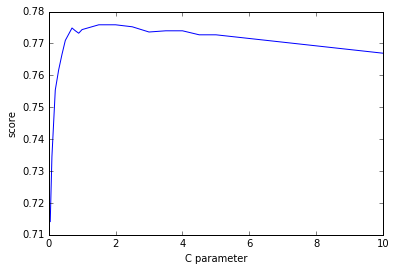

In [34]:
plt.plot(np.array(learning_curve)[:, 0],
        np.array(learning_curve)[:, 1])
plt.xlabel("C parameter")
plt.ylabel("score")

In [35]:
np.array(learning_curve)[:, 0][np.array(learning_curve)[:, 1].argmax()]

1.5

In [36]:
%%time
clf = LogisticRegression(C=1.5)
clf.fit(X, y)
y_submit = clf.predict(X_submit)
write_to_csv(y_submit, "bestC.csv")

CPU times: user 41.8 s, sys: 940 ms, total: 42.7 s
Wall time: 10.9 s


In [ ]:
#Normalization

In [57]:
c = Counter(";".join([";".join(_) for _ in train_df.ingredients.values]).split(";"))
list(c.keys()).index("butter")
ingredients_index = list(c.keys())

In [58]:
%%time
n = train_df.shape[0]
m = len(c.keys())
X = lil_matrix((n, m), dtype=np.int)
y = np.zeros(n, dtype=np.int)
for recipe in range(n):
    y[recipe] = cuisines.index(train_df.loc[recipe].cuisine)
    for ingr in train_df.loc[recipe].ingredients:
        X[recipe, ingredients_index.index(ingr)] = 1

CPU times: user 1min 24s, sys: 920 ms, total: 1min 25s
Wall time: 1min 25s


In [59]:
%%time
n = test_df.shape[0]
m = len(c.viewkeys())
X_weighted = lil_matrix((n, m), dtype=X.dtype)
for recipe in range(n):
    weight = len(test_df.loc[recipe].ingredients)
    for order, ingr in enumerate(test_df.loc[recipe].ingredients):
        try:
            X_weighted[recipe, ingredients_index.index(ingr)] = 1 + 0.5 * (weight - order) / float(weight)
        except ValueError:
            pass

CPU times: user 21.7 s, sys: 342 ms, total: 22.1 s
Wall time: 21.9 s


In [60]:
np.array((X_weighted[:50, :].todense())).max(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  500.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([ 0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,
         0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,
         0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ,  1.02,
         1.04,  1.06,  1.08,  1.1 ,  1.12,  1.14,  1.16,  1.18,  1.2 ,
         1.22,  1.24,  1.26,  1.28,  1.3 ,  1.32,  1.34,  1.36,  1.38,
         1.4 ,  1.42,  1.44,  1.46,  1.48,  1.5 ]),
 <a list of 50 Patch objects>)

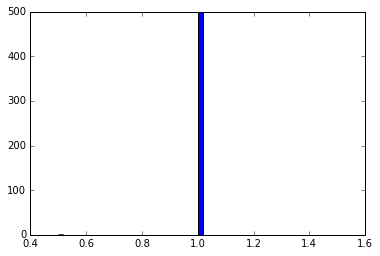

In [61]:
plt.hist(np.array((X_weighted[:500, :].todense())).max(axis=1), bins=50)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
learning_curve = []
for c in [0.5, 0.75, 1.0, 1.25, 1.5, 2.0]:
    clf = LogisticRegression(C=c)
    clf.fit(X_train, y_train)
    learning_curve.append((c, clf.score(X_test, y_test)))
    print(learning_curve[-1])

(0.5, 0.76907605279698299)
(0.75, 0.77196731615336267)
(1.0, 0.77259585166561906)
(1.25, 0.77347580138277816)
(1.5, 0.77385292269013195)
(2.0, 0.77297297297297296)


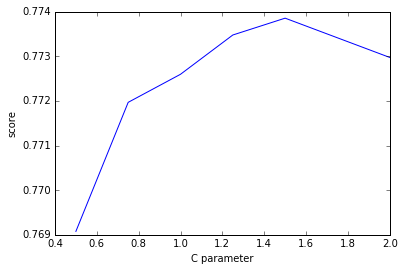

In [66]:
plt.plot(np.array(learning_curve)[:, 0],
         np.array(learning_curve)[:, 1])
plt.xlabel("C parameter")
plt.ylabel("score")

In [67]:
np.array(learning_curve)[:, 0][np.array(learning_curve)[:, 1].argmax()]

1.5

In [68]:
clf = LogisticRegression(C=1.5)
clf.fit(X, y)
y_weighted = clf.predict(X_weighted) # Note: not so good as expected :(

In [69]:
confusion_matrix(y, clf.predict(X))

array([[ 964,   16,    1,   12,    0,   11,  129,    9,    2,    1,    0,
           0,    0,    0,   22,    1,    0,    0,    4,    3],
       [   3, 3855,    5,   15,    5,   12,  116,   73,   10,   16,    3,
           0,  106,    3,   76,    1,    9,    0,    5,    7],
       [   0,   27,  600,    6,    0,    4,   17,   17,   45,    1,   11,
           4,    2,    5,   12,    1,    1,    1,    0,    1],
       [   6,   17,    1, 2856,    2,    0,   27,   33,    3,    1,   13,
           1,    1,    0,   13,    5,    0,    2,   22,    0],
       [   0,   24,    1,   12,  447,    1,   10,   13,    1,    4,    0,
           0,    1,    2,    5,    1,    1,    0,    1,    2],
       [  11,   36,    4,    5,    0,  630,  137,   78,    0,    3,    1,
           0,    7,    1,   64,    2,    2,    0,    6,    2],
       [  42,   88,    1,    9,    0,   22, 7414,   34,    2,    8,    2,
           0,   11,    1,  175,    4,    8,    1,    6,   10],
       [   3,   91,    6,   10,    3,   2

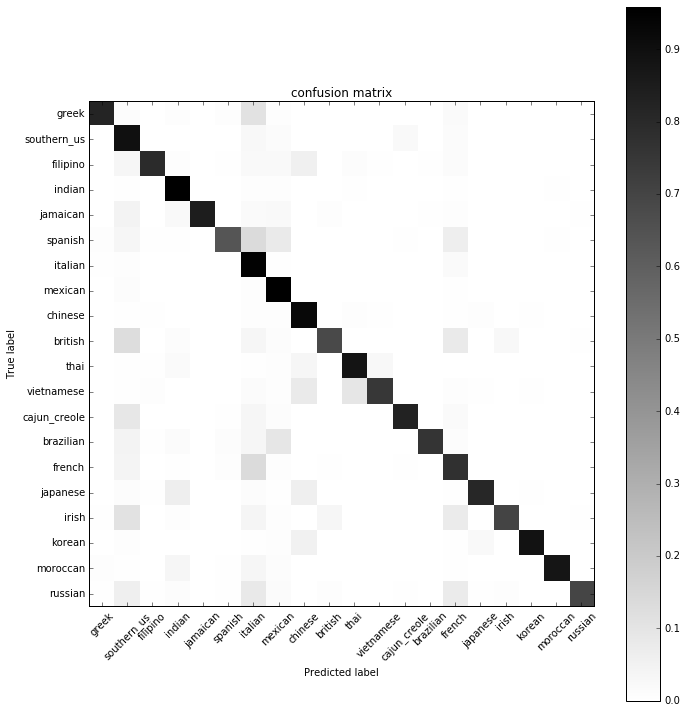

In [70]:
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y, clf.predict(X))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.binary)
plt.title("confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(cuisines))
plt.xticks(tick_marks, cuisines, rotation=45)
plt.yticks(tick_marks, cuisines)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.png', dpi=200)

In [74]:
#bag of ingredients
train_df = pd.read_json('train.json')
ingredients_bag = train_df.ingredients[0]
cv = CountVectorizer()
X = cv.fit_transform(ingredients_bag)
X.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [77]:
#don't split each element
cv2 = CountVectorizer(token_pattern=r"(?u)\b\w[\w\s]+\b")
X2 = cv2.fit_transform(ingredients_bag)
X2.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [81]:
cv = CountVectorizer(token_pattern=r"(?u)\b\w[\w\s]+\b")
X = cv.fit_transform([";".join(z) for z in train_df.ingredients])
X.shape

(39774, 6815)

In [83]:
#encode the labels
enc = LabelEncoder()
y = enc.fit_transform(train_df.cuisine)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

CPU times: user 29 s, sys: 643 ms, total: 29.7 s
Wall time: 7.53 s


In [88]:
logistic.score(X_test, y_test)

0.77938403519798871

In [90]:
cv = CountVectorizer(strip_accents='ascii')
X = cv.fit_transform([" ".join(z) for z in train_df.ingredients])
X.shape

(39774, 3005)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

CPU times: user 58 s, sys: 1.35 s, total: 59.3 s
Wall time: 15.1 s


In [93]:
logistic.score(X_test, y_test)

0.78642363293526085

In [94]:
cv = CountVectorizer(strip_accents='ascii', ngram_range=(1, 2))
X = cv.fit_transform([" ".join(z) for z in train_df.ingredients])
X.shape

(39774, 81024)

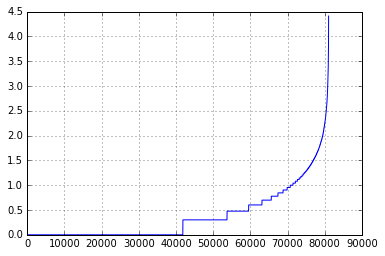

In [97]:
counts = np.array(X.sum(axis=0))[0, :].copy()
counts.sort()
plt.plot(np.log10(counts))
plt.grid(True)

In [98]:
X = X[:, np.log10(counts) < 4] # 4 features
X.shape

(39774, 81010)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
%%time
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

CPU times: user 1min 56s, sys: 2.69 s, total: 1min 59s
Wall time: 30.4 s


In [101]:
logistic.score(X_test, y_test)

0.7801382778126964